In [ ]:
#Importing libraries
import numpy as np 
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


    
#Import dataset
df = pd.read_excel('Online Retail.xlsx')

display(df.head())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
display(df.info())
display(df.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


None

,count,mean,min,25%,50%,75%,max,std
Quantity,541909.0,9.55225,-80995.0,1.0,3.0,10.0,80995.0,218.081158
InvoiceDate,541909,2011-07-04 13:34:57.156386048,2010-12-01 08:26:00,2011-03-28 11:34:00,2011-07-19 17:17:00,2011-10-19 11:27:00,2011-12-09 12:50:00,NaN
UnitPrice,541909.0,4.611114,-11062.06,1.25,2.08,4.13,38970.0,96.759853
CustomerID,406829.0,15287.69057,12346.0,13953.0,15152.0,16791.0,18287.0,1713.600303


In [ ]:
duplicates = df[df.duplicated()]

print(duplicates)

       InvoiceNo StockCode                        Description  Quantity  \
517       536409     21866        UNION JACK FLAG LUGGAGE TAG         1   
527       536409     22866      HAND WARMER SCOTTY DOG DESIGN         1   
537       536409     22900    SET 2 TEA TOWELS I LOVE LONDON          1   
539       536409     22111       SCOTTIE DOG HOT WATER BOTTLE         1   
555       536412     22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   
...          ...       ...                                ...       ...   
541675    581538     22068        BLACK PIRATE TREASURE CHEST         1   
541689    581538     23318     BOX OF 6 MINI VINTAGE CRACKERS         1   
541692    581538     22992             REVOLVER WOODEN RULER          1   
541699    581538     22694                       WICKER STAR          1   
541701    581538     23343       JUMBO BAG VINTAGE CHRISTMAS          1   

               InvoiceDate  UnitPrice  CustomerID         Country  
517    2010-12-01 11:45:00     

In [ ]:
# Check for missing values
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [ ]:
# Get all column names
all_variables = df.columns

# Target variable
output_variable = "Quantity"

# Feature variables(all columns except the target) 
features = all_variables.drop(output_variable).to_list()

print(features)


['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country', 'InvoiceMonth', 'DayOfWeek', 'Hour', 'CountryCode', 'ProductCode']


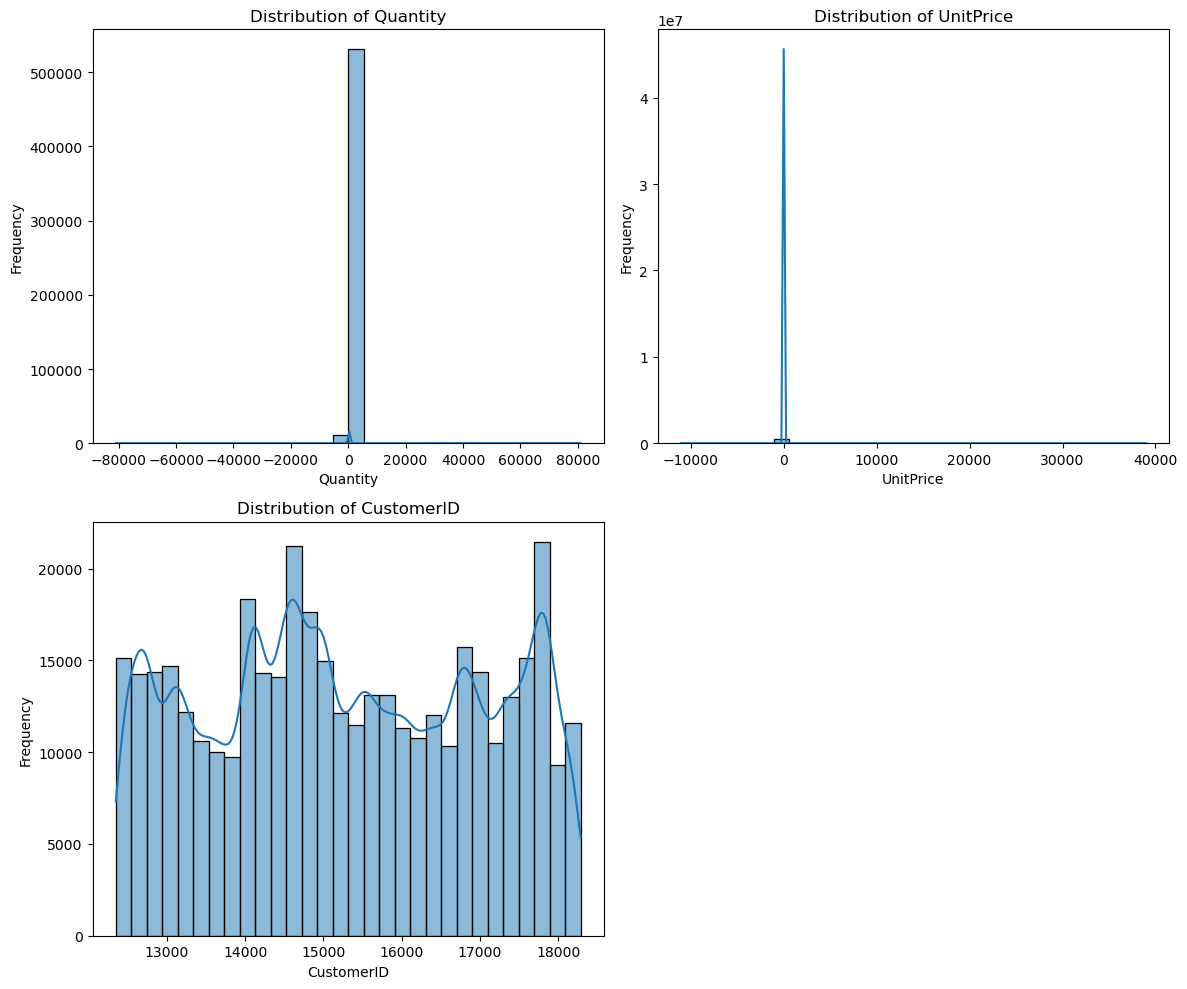

In [ ]:
# Histogram of numerical features
numeric = df.select_dtypes(include='number').columns

plots = len(numeric)
rows = (plots // 2) + 1  
plt.figure(figsize=(12, 5 * rows))
for i, col in enumerate(numeric):
    plt.subplot(rows, 2, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [ ]:
# Drop rows with missing CustomerID or Description
df = df.dropna(subset=['CustomerID', 'Description'])

# Remove returns or incorrect entries 
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

#Fix data type
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
#create new columns to split the invoice date
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek
df['Hour'] = df['InvoiceDate'].dt.hour

# Convert text columns to category type 
df['Country'] = df['Country'].astype('category')
df['StockCode'] = df['StockCode'].astype('category')

# Turn category values into numbers 
df['CountryCode'] = df['Country'].cat.codes
df['ProductCode'] = df['StockCode'].cat.codes

print(df.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'InvoiceMonth', 'DayOfWeek',
       'Hour', 'CountryCode', 'ProductCode'],
      dtype='object')


In [ ]:
# Scale UnitPrice and Quantity 
scaler = StandardScaler()
df[['UnitPrice', 'Quantity']] = scaler.fit_transform(df[['UnitPrice', 'Quantity']])



In [ ]:
#Input
X = df[['ProductCode', 'UnitPrice', 'Hour', 'DayOfWeek', 'CountryCode']]

#Target we want to predict 
y = df['Quantity']  

# Training test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Part 2: Model Building and Evaluation

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report

#Initialize models
lr_model= LogisticRegression()
rf_model = RandomForestClassifier(random_state=42)
svm_model= SVC(probability=True)


In [ ]:
#Hyperparameter tuning for Random Forest
param_grid= {'n_estimators': [100,200], 'max_depth': [None,10]}
grid_search= GridSearchCV(rf-model, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)
best_rf= grid_search.best_estimator_

In [ ]:
#Train models once on the train set
lr_model.fit(X-X_train, y_train)
best_rf.fit(X_train, y_train)
svm_model.fit(X_train, y_train)


In [ ]:
#Predict on the test set
lr_pred= lr_model.predict(X_test)
rf_pred = best_rf.predict(X_test)
svm_pred=svm_model.predict(X-X_test)



In [ ]:
#Evaluation fuction
def evaluate_model(name, model, y_pred):
    print(f"\n {name} Evaluation:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))
    print(classification_report(y_test, y_pred))

    evaluate_model("Logistic Regression", lr_model, lr_pred)
    evaluate_model("Random Forest", best_rf, rf_pred)
    evaluate_model("SVM", svm_model, svm_pred)

In [ ]:
#Cross-validation setup
cv= StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#Cross-validation scores
lr_cv_f1 = cross_val_score(lr_model, X, y, cv=cv, scoring='f1')
rf_cv_f1 = cross_val_score(best_rf, X, y, cv=cv, scoring='f1')
svm_cv_f1 = cross_val_score(svm_model, X, y, cv=cv, scoring='f1')

In [ ]:
print("\n Cross-Validation F1 Scores:")
print("Logistic Regression:", lr_cv_f1.mean())
print("Random Forest:", rf_cv_f1.mean())
print("SVM:", svm_cv_f1.mean())

In [ ]:
#Final model selection
cv_scores={
    'Logistic Regression': lr_cv_f1.mean(),
    'Random Forest': rf_cv_f1.mean(),
    'SVM': svm_cv_f1.mean(),
}
final_model_name=max(cv_scores, key=cv_scores.get)
print("\n Final Selected Model:", final_model_name)
